<a href="https://colab.research.google.com/github/Sreraj/NLP-Projects/blob/main/Text_Emotion_Detection__Nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Nltk
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer
# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load dataset

train = pd.read_csv("/content/emotion-labels-train.csv")
test = pd.read_csv("/content/emotion-labels-test.csv")
label = pd.read_csv("/content/emotion-labels-val.csv")
train

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [3]:
train.shape

(3613, 2)

In [4]:
test

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy
...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,sadness
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
3139,"@AceOperative789 no pull him afew weeks ago, s...",sadness
3140,I'm buying art supplies and I'm debating how s...,sadness


In [5]:
test.shape

(3142, 2)

In [6]:
label

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy
...,...,...
342,Common app just randomly logged me out as I wa...,sadness
343,"I'd rather laugh with the rarest genius, in be...",sadness
344,If you #invest in my new #film I will stop ask...,sadness
345,"Just watched Django Unchained, Other people ma...",sadness


In [7]:
label.shape

(347, 2)

In [8]:
# Join 3 dataset

df = pd.concat([train, test, label],ignore_index=True)
df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
7097,Common app just randomly logged me out as I wa...,sadness
7098,"I'd rather laugh with the rarest genius, in be...",sadness
7099,If you #invest in my new #film I will stop ask...,sadness
7100,"Just watched Django Unchained, Other people ma...",sadness


In [9]:
# Shape of data
df.shape

(7102, 2)

In [10]:
# Check duplicates
df.duplicated().sum()

0

In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7102 non-null   object
 1   label   7102 non-null   object
dtypes: object(2)
memory usage: 111.1+ KB


In [12]:
# Check null values
df.isna().sum()

,0
text,0
label,0


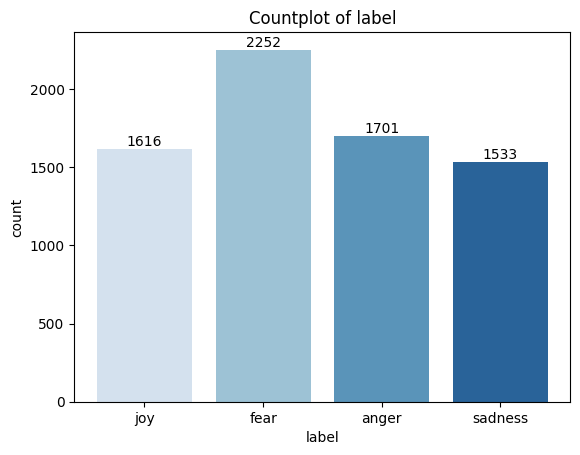

In [13]:
# Countplot of Label

ax = sns.countplot(x='label',data=df,palette='Blues')
for bars in ax.containers:
  ax.bar_label(bars)
  plt.title("Countplot of label")
  plt.plot()

In [14]:
text = df['text']
text

,text
0,Just got back from seeing @GaryDelaney in Burs...
1,Oh dear an evening of absolute hilarity I don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...
3,"@gardiner_love : Thank you so much, Gloria! Yo..."
4,I feel so blessed to work with the family that...
...,...
7097,Common app just randomly logged me out as I wa...
7098,"I'd rather laugh with the rarest genius, in be..."
7099,If you #invest in my new #film I will stop ask...
7100,"Just watched Django Unchained, Other people ma..."


In [15]:
# tokenization

tk = TweetTokenizer()
text = text.apply(lambda x: " ".join(tk.tokenize(x)))
text

,text
0,Just got back from seeing @GaryDelaney in Burs...
1,Oh dear an evening of absolute hilarity I don'...
2,Been waiting all week for this game ❤ ️ ❤ ️ ❤ ...
3,"@gardiner_love : Thank you so much , Gloria ! ..."
4,I feel so blessed to work with the family that...
...,...
7097,Common app just randomly logged me out as I wa...
7098,"I'd rather laugh with the rarest genius , in b..."
7099,If you #invest in my new #film I will stop ask...
7100,"Just watched Django Unchained , Other people m..."


In [16]:
# replacing values

text = text.str.replace("[^a-zA-Z0-9]"," ",regex=True)
text

,text
0,Just got back from seeing GaryDelaney in Burs...
1,Oh dear an evening of absolute hilarity I don ...
2,Been waiting all week for this game ...
3,gardiner love Thank you so much Gloria ...
4,I feel so blessed to work with the family that...
...,...
7097,Common app just randomly logged me out as I wa...
7098,I d rather laugh with the rarest genius in b...
7099,If you invest in my new film I will stop ask...
7100,Just watched Django Unchained Other people m...


In [17]:
# Stemming and convert to lowercase

ss = SnowballStemmer(language='english')

text = text.apply(lambda x : " ".join([ss.stem(i.lower()) for i in tk.tokenize(x)]))
text

,text
0,just got back from see garydelaney in burslem ...
1,oh dear an even of absolut hilar i don t think...
2,been wait all week for this game cheer friday
3,gardin love thank you so much gloria you re so...
4,i feel so bless to work with the famili that i...
...,...
7097,common app just random log me out as i was wri...
7098,i d rather laugh with the rarest genius in bea...
7099,if you invest in my new film i will stop ask y...
7100,just watch django unchain other peopl may frow...


In [18]:
# Remove Stopwords
stop = stopwords.words("english")

text = text.apply(lambda x: " ".join([i for i in tk.tokenize(x) if i not in stop]))
text

,text
0,got back see garydelaney burslem amaz face sti...
1,oh dear even absolut hilar think laugh much lo...
2,wait week game cheer friday
3,gardin love thank much gloria sweet thought ma...
4,feel bless work famili nanni noth love appreci...
...,...
7097,common app random log write last part colleg e...
7098,rather laugh rarest genius beauti allianc kept...
7099,invest new film stop ask invest new film conce...
7100,watch django unchain peopl may frown titter de...


In [19]:
# Vectorization

tf = TfidfVectorizer()
data = tf.fit_transform(text)
data

<7102x13131 sparse matrix of type '<class 'numpy.float64'>'
	with 64586 stored elements in Compressed Sparse Row format>

In [20]:
data.shape

(7102, 13131)

In [21]:
# Encoding output data

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [22]:
# input and output
x = data
y = df['label']

In [23]:
# Train Test Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
# Model Creation
sv = SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
nb = MultinomialNB()

model = [sv,lr,dt,rf,knn,nb]

for i in model:
  print("Model is :", i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print("Accuracy Score is :",accuracy_score(y_test,y_pred))
  print("Confusion Matrix is :",confusion_matrix(y_test,y_pred))
  print("Classification Report is :",classification_report(y_test,y_pred))
  print("*"*100)

Model is : SVC()
Accuracy Score is : 0.8456123885499766
Confusion Matrix is : [[410  41   8  37]
 [ 10 621   6  27]
 [  9  56 436  13]
 [ 26  88   8 335]]
Classification Report is :               precision    recall  f1-score   support

           0       0.90      0.83      0.86       496
           1       0.77      0.94      0.84       664
           2       0.95      0.85      0.90       514
           3       0.81      0.73      0.77       457

    accuracy                           0.85      2131
   macro avg       0.86      0.84      0.84      2131
weighted avg       0.85      0.85      0.85      2131

****************************************************************************************************
Model is : LogisticRegression()
Accuracy Score is : 0.8385734396996715
Confusion Matrix is : [[404  40  13  39]
 [ 15 607  15  27]
 [ 10  54 434  16]
 [ 30  76   9 342]]
Classification Report is :               precision    recall  f1-score   support

           0       0.88      0

In [25]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
cls1 = SVC()
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
gv  = GridSearchCV(cls1,parameters,cv=3, scoring='accuracy', verbose=1,n_jobs=-1)
gv.fit(x_train,y_train)
print("Best Parameters: ", gv.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [26]:
model1 = SVC(C =1,kernel='linear',gamma='scale')
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_test,y_pred1))

Accuracy Score is : 0.8578132332238386


In [27]:
y.value_counts()

,count
label,
1,2252
0,1701
2,1616
3,1533


In [29]:
input_message = ["This is unacceptable! I've been waiting for an hour, and no one has even bothered to help."]
input_message_tfidf = tf.transform(input_message)

# Predict using the SVM model
y_new = model1.predict(input_message_tfidf)
result = "anger" if y_new[0] == 0 else "fear" if y_new[0] == 1 else "joy" if y_new[0] == 2 else "sadness"
print(result)

anger
